# Lab5 -Activity

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


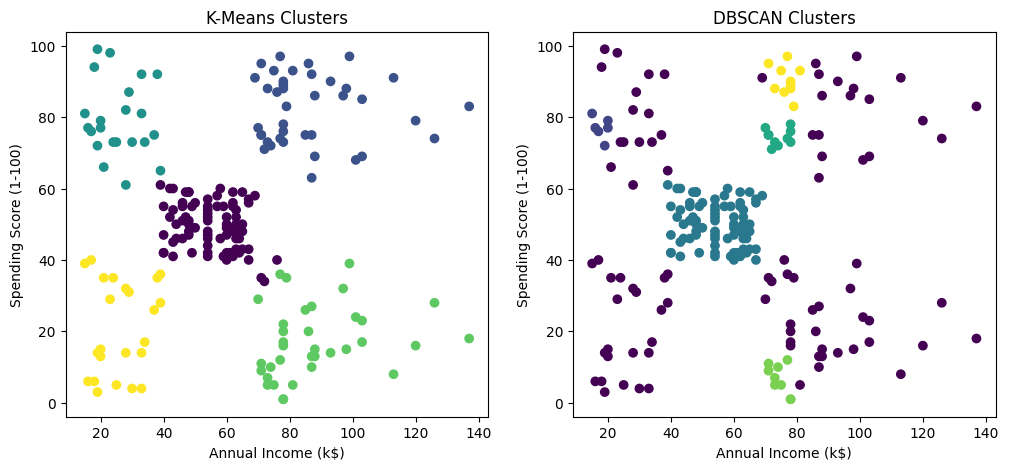

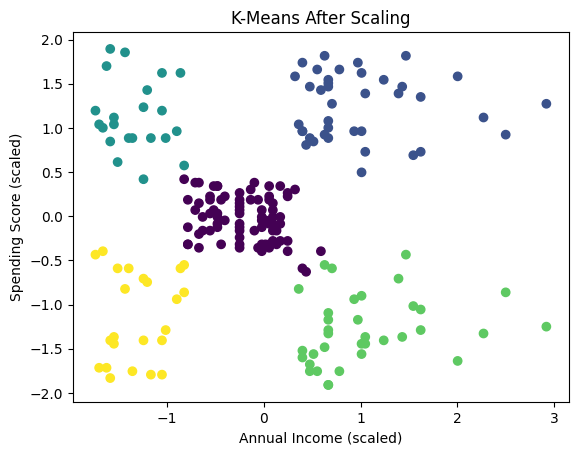

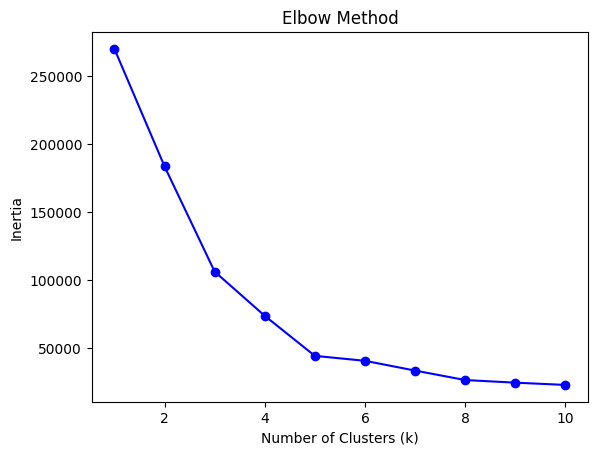

In [3]:
import pandas as pd

# 1. Loading Dataset
mall_data = pd.read_csv("./Mall_Customers.csv")
print(mall_data.head())

# 2.    Applying k-mean and DBSCAN

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN

X = mall_data[['Annual Income (k$)', 'Spending Score (1-100)']]

kmeans = KMeans(n_clusters=5, random_state=42)
mall_data['KMeans_Cluster'] = kmeans.fit_predict(X)


dbscan = DBSCAN(eps=5, min_samples=5)
mall_data['DBSCAN_Cluster'] = dbscan.fit_predict(X)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=mall_data['KMeans_Cluster'], cmap='viridis')
plt.title("K-Means Clusters")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.subplot(1,2,2)
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=mall_data['DBSCAN_Cluster'], cmap='viridis')
plt.title("DBSCAN Clusters")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")

plt.show()

# Scaling features using standard scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans_scaled = KMeans(n_clusters=5, random_state=42)
mall_data['KMeans_Scaled_Cluster'] = kmeans_scaled.fit_predict(X_scaled)

plt.scatter(X_scaled[:,0], X_scaled[:,1], c=mall_data['KMeans_Scaled_Cluster'], cmap='viridis')
plt.title("K-Means After Scaling")
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.show()

# Elbow method fo best K
inertia = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    inertia.append(km.inertia_)

plt.plot(range(1, 11), inertia, 'bo-')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()

# Explaination of results
# 0 cluster shows low income, low spending 
# 1 cluster shows high income, high spending
# 2 cluster shows high income, low spending
# 3 cluster shows medium income, medium spending
# 4 cluster shows low income, high spending

# lucku number

import numpy as np

mall_data['LuckyNumber'] = np.random.randint(0, 101, size=len(mall_data))

X_new = mall_data[['Annual Income (k$)', 'Spending Score (1-100)', 'LuckyNumber']]
kmeans_new = KMeans(n_clusters=5, random_state=42)
mall_data['KMeans_with_Lucky'] = kmeans_new.fit_predict(X_new)
